<a href="https://colab.research.google.com/github/chhyyi/aiffel/blob/main/lms_exp2/LMS_EXP_BS2_2_howManyBicycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LMS노드 - EXP BS2 연습노트

Q나)철학이 뭘까요?
Q나)손실함수란?

## 2-3 Error 와 Regression Model Accuracy

(모델의 예측값) - (실제값)을 샘플 i의 error, $E_i$라고 하겠습니다. 이 때
mean absolute error(MAE)는 $\frac{\sum_{i=0}^n \left|E_i\right|}{N}$ 인데 error의 절대값의 평균입니다.
mean squared error(MSE)는 에러의 제곱의 평균이고 RMSE는 MSE의 제곱근입니다. 마지막으로 R-squared는 분모에 (실제값 - 평균값)제곱의 합, (실제값-모델 예측값) 제곱의 합을 1에서 뺀 값을 R-squared라고 보고 이것이 1에 가까울 수록 모델이 정확하다고 봅니다. 이게 어떻게 성립하는지 2개의 샘플 데이터포인트만 있다고 생각해봅시다.
$(1,1)$, $\left({2,2}\right)$
y=x가 정확한 모델이죠.
y평균은 1.5입니다. 분자는 0, 0이고 분모가 뭐든 0이 됩니다.
약간 틀렸다고 해봅시다. y=1.1x-0.1이라고 하죠.
분자는 0, 0.01 분모는 0.25+025
그렇습니다. 분모는 모델에 의존하지 않아요. 분모는 샘플들이 평균에서 멀리 떨어져있을수록 커질 뿐입니다. 각각의 가중치가 아닙니다. 0이 되는 경우를 살펴보고 싶지만 그냥 넘어갑시다

### Loss Function 
그냥 RSME같은 거를 손실함수로 씁니다.

## 2-5 경사하강법
2차원에서 gradient 계산
$η$

Q나) 왜 Gradient라면서 두 변수 w, b에 대한 편미분값을 반환하나? 벡터가 아니고 튜플이잖아. 근데 값은 제대로 전달했으니 잘 쓰면 되는거 아닌가? 근데 써먹는 쪽에서는 벡터 내적과 같은 식으로 받았으니 상관이 없네



# 2-12 project 1. 당뇨병 환자 데이터로 실습

## (1)데이터를 df_X, df_Y에 저장하기 : 이건 pandas의 DataFrame으로 저장하라는 것 같습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression


from sklearn.datasets import load_diabetes
diab=load_diabetes()
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

pandas dataframe에 잘 넣어봅시다. df_X의 각각의 column에 feature name과 데이터를 넣고, df_Y는 target값을 확인해야 하겠습니다.

```python
print(load_diabetes().data)
print(diab.data.shape)
print(diab.target)
print(diab.feature_names)
print(diab.DESCR)
```


load_diabetes의 다음 정보들을 통해서 우리는 10 feature가 각각 어떤 것인지, Target이 무엇인지 등을 알 수 있었습니다. Target은 당뇨 진행도였고, 이것은 load_diabetes().target 에 1-d array로 저장돼 있었습니다. 나머지 feature는 $442 \times 10$ dimension으로 data method로 호출 가능합니다. 따라서 df_X와 df_Y는 다음과 같이 됩니다.

In [ ]:
df_X=pd.DataFrame(data=diab.data, columns=diab.feature_names)
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
df_Y=pd.Series(data=diab.target)
df_Y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64

## (2, 3) 모델에 입력할 X, Y 준비하기 
이걸 왜 하는지 모르겠습니다. 확인용일 수도 있겠네요. (4)에서는 df_X, df_Y로 넣어줘도 되는데요.

In [ ]:
X=diab.data
Y=diab.target
#print(X, Y)

In [ ]:
from sklearn.model_selection import train_test_split
#help(train_tset_split)

train_test_split의 사용방법이 기억나지 않아 help를 이용했습니다만 가독성을 고려해 주석처리 하겠습니다.

In [ ]:
#X_train, X_test, Y_train, Y_test =train_test_split(df_X, df_Y, train_size=0.8, random_state=8)
#or
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, train_size=0.8, random_state=8)

## (5) w, b 준비하고 모델 함수 구현하기

shape에서도 확인했지만 10개의 feature를 학습시킬 것이므로 10개의 w가 필요합니다. model은 linear regression을 사용하도록 하겠습니다. 이전에 썼기 때문입니다. b는 linear regression이니 1개만 있으면 됩니다.

In [ ]:
w=np.ones((10,))/2 #all w, b set to 0.5 with no reason.
b = 0.5

def model(xs, weights, bias):
    return xs.dot(weights)+bias
model(X,w,b).shape

(442,)

## (6) loss function as MSE
model의 예측값과 ys가 필요합니다.

In [ ]:
def loss(xdata,ys,weights,bias):
    return sum([(model(xdata[i], weights, bias)-ys[i])**2 for i in range(len(ys))])/len(ys)
loss(X, Y, w, b)

28912.985110245623

## (7) gradient 함수 정의하기
이 경우 주어진 X(vector)에서 error function을 w0...w9로 편미분한 10차원 벡터값을 내놓으면 되는데 list로 반환하겠습니다. 산술적(해석적)으로 미분값을 계산할 수도 있고 수치적으로 할 수도 있는데 어떻게 할까요? 일단 해석적으로 하면
$2 x_i \vec{W_i} \left({model(\vec{x})-y_i}\right) + 2 \vec{b} \left({model({\vec{x})}-y_i}\right)$ 이 되는데 이걸 쓰겠습니다. 

In [ ]:
def grad_one_row(xdata, ys, weights, bias):
    grad=np.zeros(10)
    b_sum=0
    for j in range(len(ys)):
        for i in range(len(weights)):
            grad+=2.0*xdata[j]*weights[i]*(model(xdata[j],weights,bias)-ys[j])
            b_sum+=2.0*(model(xdata[j],weights,bias)-ys[j])
    return grad/len(ys), b_sum/len(ys)

In [ ]:
learning_rate=.001
target_loss=1.0

max_iter=3000
closs=0.0


for i in range(max_iter):
    dw=np.zeros(10)
    db=0
    closs=loss(X_train, Y_train, w, b)
    if closs<target_loss:
        break
    else:
        dw,db=grad_one_row(X_train,Y_train,w,b)
        w-=dw*learning_rate
        b-=db*learning_rate

#    print(i,'-th step loss:',closs)

353 353


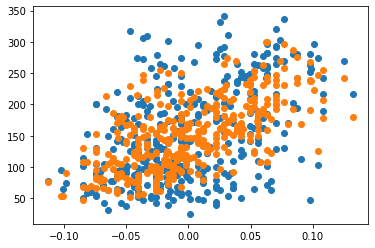

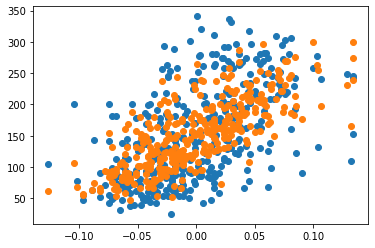

In [ ]:
print(len(X_train[:,0]),len(Y_train))
plt.scatter(X_train[:,3],Y_train)
plt.scatter(X_train[:,3],model(X_train,w,b))
plt.show()
plt.scatter(X_train[:,8],Y_train)
plt.scatter(X_train[:,8],model(X_train,w,b))
plt.show()

In [ ]:
y_pred=model(X_test,w,b)
#for i in range(len(y_pred)):
    #print(y_pred[i],Y_test[i])

print('total accuracy(my_LR) = {:.2%}'.format(float((1-np.abs(y_pred-Y_test)/Y_test).mean())))
print(w,b)
print(loss(X, Y, w, b))

total accuracy(my_LR) = 61.30%
[   6.22545817 -265.51921493  532.65974929  369.24880514 -152.85518375
  -87.93766899 -208.85745151  139.01624114  422.58292944  106.26062347] 152.04650736973628


## 직접 학습 모델을 코딩한 것과 sklearn의 결과 비교

In [ ]:
sklearn_LR=LinearRegression()
sklearn_LR.fit(X_train,Y_train)
y_pred_sklearn = sklearn_LR.predict(X_test)

print('total accuracy (SKlearn_LR)= {:.2%}'.format(float((1-np.abs(y_pred_sklearn-Y_test)/Y_test).mean())))

total accuracy (SKlearn_LR)= 61.01%


In [ ]:
print('total accuracy (SKlearn_LR)= {:.2%}'.format(float((1-np.abs(y_pred-y_pred_sklearn)/y_pred_sklearn).mean())))

total accuracy (SKlearn_LR)= 96.55%


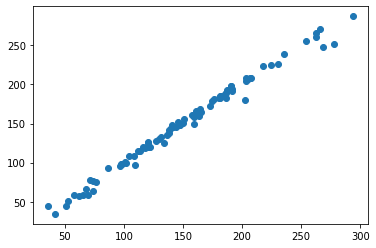

In [ ]:
plt.scatter(y_pred,y_pred_sklearn)
plt.show()

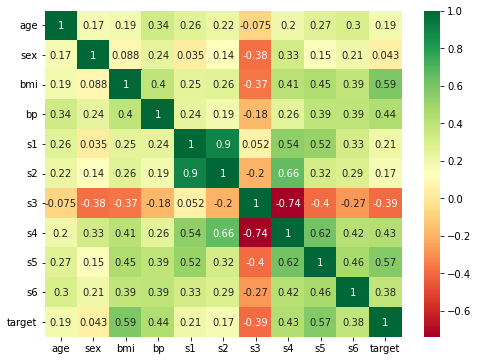

In [ ]:
df_X['target']=df_Y
sns.heatmap(df_X.corr(), annot=True, cmap='RdYlGn')
plt.gcf()
plt.gcf().set_size_inches(8,6)
plt.show()

# 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
지금 google colab에서 하고 있기 때문에, csv파일을 따로 업로드합니다. 현재 디렉토리에 test.csv, train.csv가 업로드됐다고 가정합니다.

In [ ]:
ctrain=pd.read_csv('train.csv')
ctest=pd.read_csv('test.csv')

In [ ]:
print(ctrain.head())
print(ctest.head())
print(ctrain.isnull().any())
print(ctest.isnull().any())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1 

In [ ]:
ctrain['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

## 일시 데이터 나누기 : 여기서는 pandas의 Datetimeindex 메소드를 사용합니다. 

```python
pd.DatetimeIndex(ctrain['datetime'])
```

In [ ]:
#datetimes=pd.to_datetime(cycle_train_data['datetime'])
pd.DatetimeIndex(ctrain['datetime']).year


Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=10886)

In [ ]:
ctrain['year']=0
ctrain['month']=0
ctrain['day']=0
ctrain['hour']=0
ctrain['minute']=0
ctrain['second']=0

ctrain['year']=pd.DatetimeIndex(ctrain['datetime']).year
ctrain['month']=pd.DatetimeIndex(ctrain['datetime']).month
ctrain['day']=pd.DatetimeIndex(ctrain['datetime']).day
ctrain['hour']=pd.DatetimeIndex(ctrain['datetime']).hour
ctrain['minute']=pd.DatetimeIndex(ctrain['datetime']).minute
ctrain['second']=pd.DatetimeIndex(ctrain['datetime']).second
ctrain

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

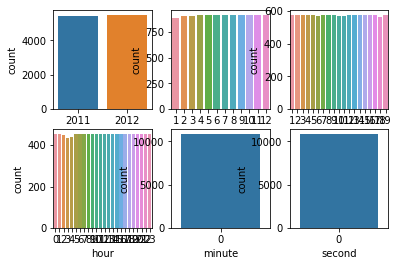

In [ ]:
fig, ax=plt.subplots(2,3)
sns.countplot(ctrain['year'],ax=ax[0,0])
sns.countplot(ctrain['month'],ax=ax[0,1])
sns.countplot(ctrain['day'],ax=ax[0,2])
sns.countplot(ctrain['hour'],ax=ax[1,0])
sns.countplot(ctrain['minute'],ax=ax[1,1])
sns.countplot(ctrain['second'],ax=ax[1,2])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


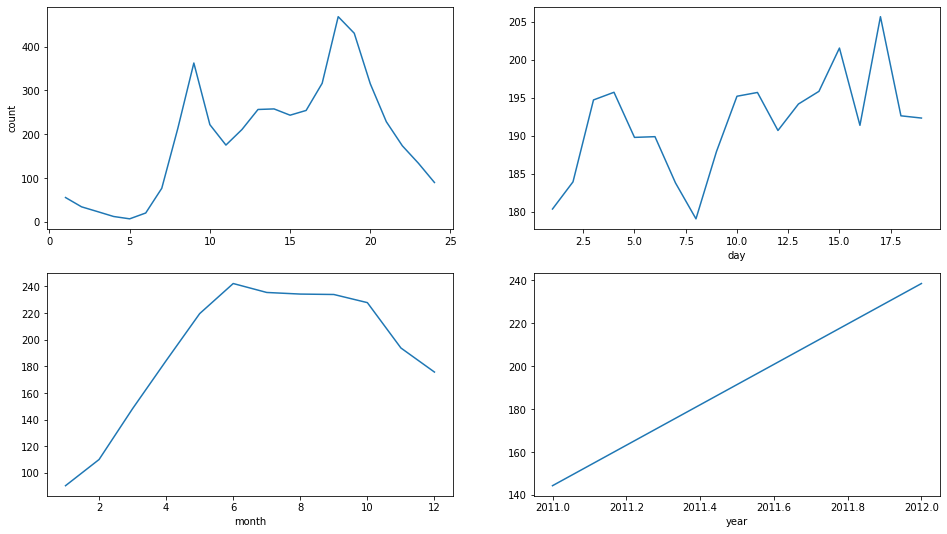

In [ ]:
fig, ax=plt.subplots(2,2,figsize=(16,9))
sns.lineplot(range(1,25),ctrain.groupby('hour')['count'].mean(),ax=ax[0,0])
#pd.Series(data=ctrain.groupby('hour')['count'].mean()).plot(ax=ax[0,0])
pd.Series(data=ctrain.groupby('day')['count'].mean()).plot(ax=ax[0,1])
pd.Series(data=ctrain.groupby('month')['count'].mean()).plot(ax=ax[1,0])
pd.Series(data=ctrain.groupby('year')['count'].mean()).plot(ax=ax[1,1])

plt.show()

### 시간에 따른 자전거 대여 수 그래프 해석
자전거 대여 수는 count로 주어져 있었습니다. 
- 먼저 ax[0,0] (좌상단)은 hour-count 즉 시간대별 대여수입니다. 9시, 18시에 크게 대여수가 올라가는 것을 알 수 있습니다. 새벽시간인 5시에는 거의 0에 가까워집니다. 이 시간대는 흔히 '출퇴근시간'으로 불리는 때로 인구이동이 많아지고, 자전거 대여수도 많아지는 것이 합리적으로 보입니다.  
- 우상단 ax[0,1]은 일별 데이터입니다만 수직축(대여수)의 최소값이 약 180, 최대값이 205 정도로 별로 차이가 없습니다. 또 0~19범위에만 값이 있는 것 같아 우리가 일반적으로 아는 day와 같은지 다시 확인할 필요가 있겠습니다만 아무튼 크게 차이는 없습니다.
- 좌상단 ax[1,0]은 1월에 비해 6월에 3배 가까이 대여수가 늘어나는 것을 보여주고 있습니다. 6-10월까지는 대여수가 크게 유지됩니다.
- 우하단 ax[1,1]은 사실 2011년, 2012년밖에 없습니다. 1년새 대여 숫자가 꽤 늘었습니다.

In [ ]:
ctest['year']=0
ctest['month']=0
ctest['day']=0
ctest['hour']=0

ctest['year']=pd.DatetimeIndex(ctest['datetime']).year
ctest['month']=pd.DatetimeIndex(ctest['datetime']).month
ctest['day']=pd.DatetimeIndex(ctest['datetime']).day
ctest['hour']=pd.DatetimeIndex(ctest['datetime']).hour

In [ ]:
ctrain.drop(['datetime','casual','registered','minute','second'],axis=1,inplace=True)
ctest.drop('datetime',axis=1,inplace=True)

In [ ]:
Y=ctrain['count'].to_numpy()
ctrain.drop('count',axis=1,inplace=True)
X=ctrain
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=8)

array([220, 156, 250, ..., 556, 626, 137])

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print('accuracy = {:.2%}'.format(float((1-np.abs((y_pred-y_test)/y_test)).mean())))
print('accuracy = {:.2%}'.format(float((1-np.abs((y_test-y_pred)/y_pred)).mean())))

print(len(y_pred))

accuracy = -251.43%
accuracy = -60.00%
2178


## Accuracy
일반적으로 사용되는 오차율의 개념을 이용해 계산한 값을 1에서 빼서 정확도라고 해보았는데요, 너무 크게 나와서 별 의미가 없어졌습니다. 오차율이 약 351%가 나왔습니다. 100%에 가깝다면 정확하다고 할 수 있겠지만 이런 값이 나오면 의미가 있는 값은 아닙니다.  
 원인은 이전에 그렸던 그래프를 보면 짐작할 수 있겠습니다. month나 hour같은 column에 대해 count(target label)은 1차식으로는 도무지 그 dependancy를 표현할 수 없는 모양을 그리고 있습니다. 이것은 one-hot encoding 등의 처리를 하지 않으면 linear regression으로는 반영할 수 없는 것입니다. 

In [ ]:
print(len(y_test),len(y_pred))

2178 2178


In [ ]:
print(X_train)
print(y_train)

       season  holiday  workingday  weather   temp   atemp  humidity  \
10357       4        0           1        1  13.12  15.150        53   
9029        3        0           0        1  31.16  33.335        37   
2132        2        0           0        1  22.96  26.515        78   
8630        3        0           1        1  28.70  33.335        74   
6826        2        0           1        1  20.50  24.240        27   
...       ...      ...         ...      ...    ...     ...       ...   
2181        2        0           1        1  24.60  29.545        69   
10601       4        0           0        2  14.76  18.180        93   
2033        2        0           1        1  26.24  31.060        41   
9556        4        0           1        2  24.60  27.275        88   
4547        4        0           1        1  19.68  23.485        48   

       windspeed  year  month  day  hour  
10357    15.0013  2012     11   16    23  
9029     19.0012  2012      8   18    14  
2132  

In [ ]:
y_pred

array([ 43.13871312, 335.7004113 , 190.31892676, ..., 351.92803339,
       397.7916833 , 147.27311733])